## Burritos 🌯 and Tacos 🌮

In [248]:
import numpy as np
import pandas as pd
import seaborn as sns
from shapely.geometry import Point
import geopandas as gpd

### Dataset Chosen

In [249]:
texmex = pd.read_csv("data/just tacos and burritos.csv")

In [250]:
texmex.head()

,id,address,categories,city,country,cuisines,dateAdded,dateUpdated,keys,latitude,...,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235
0,AVwc__cikufWRAb51QjV,610 Commercial St,"Restaurant Delivery Service,Restaurants,Pizza,...",Atchison,US,Restaurant Delivery Service,2016-03-02T11:49:34Z,2017-02-01T18:04:44Z,us/ks/atchison/610commercialst/-138126000,39.561570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AVwc__cikufWRAb51QjV,610 Commercial St,"Restaurant Delivery Service,Restaurants,Pizza,...",Atchison,US,Restaurant Delivery Service,2016-03-02T11:49:34Z,2017-02-01T18:04:44Z,us/ks/atchison/610commercialst/-138126000,39.561570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AVwc__dF_7pvs4fz1Ncy,9521 Morton Davis Dr,"Golf Course, American Restaurant, and Resort",Patterson,US,NaN,2016-10-14T01:58:25Z,2016-10-14T01:58:25Z,us/grayson/patterson/9521mortondavisdr/-522005016,37.401855,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVwc__kCByjofQCxkdm-,10550 W I 25 Frontage Rd,Fast Food Restaurant,Longmont,US,NaN,2016-09-09T17:30:34Z,2016-10-04T05:15:17Z,us/niwot/longmont/10550wi25frontagerd/-1161002137,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AVwc__WtByjofQCxkdkR,8495 W 3rd St,"Mexican Restaurant Mid-City West,Mexican Resta...",Los Angeles,US,Mexican,2016-05-19T11:50:25Z,2016-09-11T00:06:37Z,us/bicentennial/losangeles/8495w3rdst/-251199537,34.080724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [251]:
texmex.dtypes

id               object
address          object
categories       object
city             object
country          object
                 ...   
Unnamed: 231    float64
Unnamed: 232    float64
Unnamed: 233    float64
Unnamed: 234    float64
Unnamed: 235    float64
Length: 236, dtype: object

In [252]:
texmex.columns

Index(['id', 'address', 'categories', 'city', 'country', 'cuisines',
       'dateAdded', 'dateUpdated', 'keys', 'latitude',
       ...
       'Unnamed: 226', 'Unnamed: 227', 'Unnamed: 228', 'Unnamed: 229',
       'Unnamed: 230', 'Unnamed: 231', 'Unnamed: 232', 'Unnamed: 233',
       'Unnamed: 234', 'Unnamed: 235'],
      dtype='object', length=236)

### Remove all columns with Unnamed as Title

In [253]:
texmex.drop([col for col in texmex.columns if 'Unnamed' in col],axis=1, inplace=True)

In [254]:
texmex = texmex[texmex['cuisines'].notnull()]

In [255]:
texmex.columns

Index(['id', 'address', 'categories', 'city', 'country', 'cuisines',
       'dateAdded', 'dateUpdated', 'keys', 'latitude', 'longitude',
       'menuPageURL', 'menus.amountMax', 'menus.amountMin', 'menus.category',
       'menus.currency', 'menus.dateSeen', 'menus.description', 'menus.name',
       'name', 'postalCode', 'priceRangeCurrency', 'priceRangeMin',
       'priceRangeMax', 'province', 'websites'],
      dtype='object')

In [256]:
texmex.describe()

,latitude,longitude,menus.amountMax,menus.amountMin,priceRangeMin,priceRangeMax
count,37758.000000,37758.000000,19144.000000,19144.000000,27011.000000,27011.000000
mean,37.021946,-98.140643,9.441538,9.320003,14.412980,34.430010
std,4.789701,18.367478,18.634738,15.055906,14.256104,8.494689
min,0.000000,-159.492690,0.000000,0.000000,0.000000,5.000000
25%,33.789790,-117.645276,5.750000,5.690000,0.000000,25.000000
50%,36.844632,-95.572517,8.500000,8.500000,25.000000,40.000000
75%,40.735001,-81.873113,11.750000,11.500000,25.000000,40.000000
max,61.219460,29.695650,1990.000000,1290.000000,79.000000,280.000000


## Taking a look to our data

### Address

We do not need to visualize this data as is specific to each restaurant. Instead, we are going to use latitude and longitude to frame each restaurant to a map. 

In [257]:
texmex["address"].head()

0    610 Commercial St
1    610 Commercial St
4        8495 W 3rd St
5        8495 W 3rd St
6        8495 W 3rd St
Name: address, dtype: object

### Cuisines

Cuisines is a very interesting one. Inside our main type of food, there are many varieties.

In [258]:
texmex["cuisines"].unique()

array(['Restaurant Delivery Service', 'Mexican', 'Coffee Shops', ...,
       'Mexican,Latin,Spanish,Vegetarian Friendly,Gluten Free Options',
       'American,Cafe,Vegetarian Friendly,Gluten Free Options',
       'American,Cafe,Gluten Free Options,Vegetarian Friendly'],
      dtype=object)

### Final Data Frame

After checking out each column from our dataset, we finally decide to go for the columns from above. When we declared the describe function we were able to discover our numerical categories, we can play a lot with there numbers! Also we will include a categorical string mentioned before (Cuisines).

In [259]:
new_burritos = texmex[["cuisines", "menus.amountMax", "menus.amountMin", "priceRangeMin", "priceRangeMax"]]

## Frame each restaurant to map.

Before visualizing our data, we are going to mark each restaurant to custom map. Our conclusion is the majority of  restaurants from dataset are located in the United States.

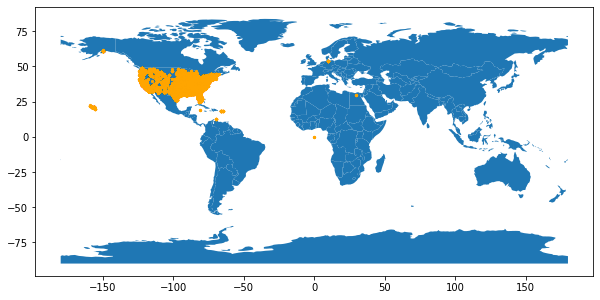

In [260]:
geometry = [Point(xy) for xy in zip(texmex['longitude'], texmex['latitude'])]
gdf = GeoDataFrame(texmex, geometry=geometry)   
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), color='orange', markersize=5);

## Scatter Plot

We can see almost a linear increment. It means there barely is a difference between min and max price of a menu.

In [261]:
new_burritos["menus.amountMin"].corr(new_burritos["menus.amountMax"])

0.9759309422393132

Text(0.5, 1.0, 'Min vs Max menu amount')

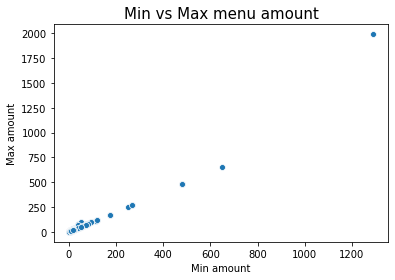

In [262]:
ax = sns.scatterplot(x="menus.amountMin", y="menus.amountMax", data=new_burritos)
ax.set_xlabel("Min amount", size=10)
ax.set_ylabel("Max amount", size=10)
plt.title("Min vs Max menu amount", size=15)

## Histogram

We use this kind of data to visualize how many kinds of cuisines our restaurants offer. As we can see, most repeated is American.

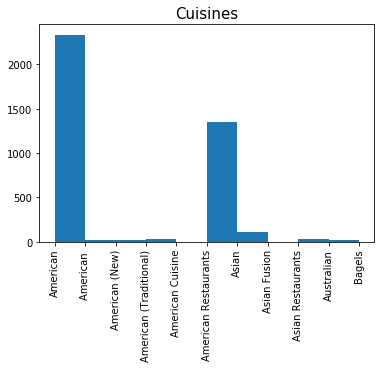

In [263]:
sorted_burritos = new_burritos["cuisines"].apply(lambda x: x.split(",", 1)[0]).sort_values().astype(str)
plt.hist(sorted_burritos[10:], range=(0,10))
plt.xticks(rotation='vertical')
plt.title("Cuisines", size=15)
plt.show()

## Box Plot

We here are doing a boxplot to visualize the data from the max price range. As we can see, there are some outliers putting the max value at 250 or 180. Instead, we can see a majority of values from close to 0 to 60.

Text(0.5, 1.0, 'Max price range')

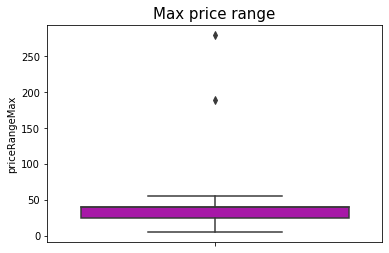

In [264]:
sns.boxplot(y="priceRangeMax", palette=["m", "g"], data=new_burritos)
plt.title("Max price range", size=15)

## Bar Graph

We use bar plot to visualize how min range price is repeated among restaurants. We can assume the offer is from 0 to 14.

Text(0.5, 1.0, 'Min price range')

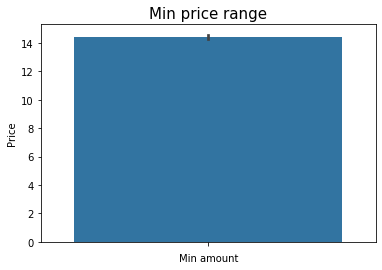

In [265]:
ax = sns.barplot(y="priceRangeMin", data=new_burritos)
ax.set_xlabel("Min amount", size=10)
ax.set_ylabel("Price", size=10)
plt.title("Min price range", size=15)